<a href="https://colab.research.google.com/github/NochnoyRitzar/Ted-Talks-Analysis/blob/master/eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
# loading data
orig_df = pd.read_csv('https://raw.githubusercontent.com/NochnoyRitzar/Ted-Talks-Analysis/master/talks_info.csv')
df = orig_df.copy()

## Initial look

In [8]:
df.head()

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA
2,7,1266,TED2006,60K,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw
3,47,1126,TEDGlobal 2005,80K,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12T00:11:00Z,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk
4,55,1524,TED2006,14K,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25T00:11:00Z,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 5631 non-null   int64 
 1   duration            5631 non-null   int64 
 2   event               5630 non-null   object
 3   likes               5631 non-null   object
 4   page_url            5631 non-null   object
 5   published_date      5631 non-null   object
 6   recorded_date       5629 non-null   object
 7   related_videos      5631 non-null   object
 8   speakers            5631 non-null   object
 9   subtitle_languages  5631 non-null   object
 10  summary             5631 non-null   object
 11  title               5631 non-null   object
 12  topics              5631 non-null   object
 13  transcript          4983 non-null   object
 14  views               5631 non-null   int64 
 15  youtube_video_code  5462 non-null   object
dtypes: int64(3), object(13)


In [10]:
# check missing values
print(f'Overall entries in dataset: {df.shape[0]}')

# count number of missing values in all columns
df.isnull().sum()

Overall entries in dataset: 5631


_id                     0
duration                0
event                   1
likes                   0
page_url                0
published_date          0
recorded_date           2
related_videos          0
speakers                0
subtitle_languages      0
summary                 0
title                   0
topics                  0
transcript            648
views                   0
youtube_video_code    169
dtype: int64

**Column 'transcript'** - Some of the talks contain dancing and singing, some also had their transcript removed, that's why we have so many missing values
</br>
**Column 'youtube_video_code'** - Talks are usually published in 2 places: official TED website and Youtube, but some videos weren't uploaded to youtube, hence we have missing values

### Let's take a deeper look at different columns

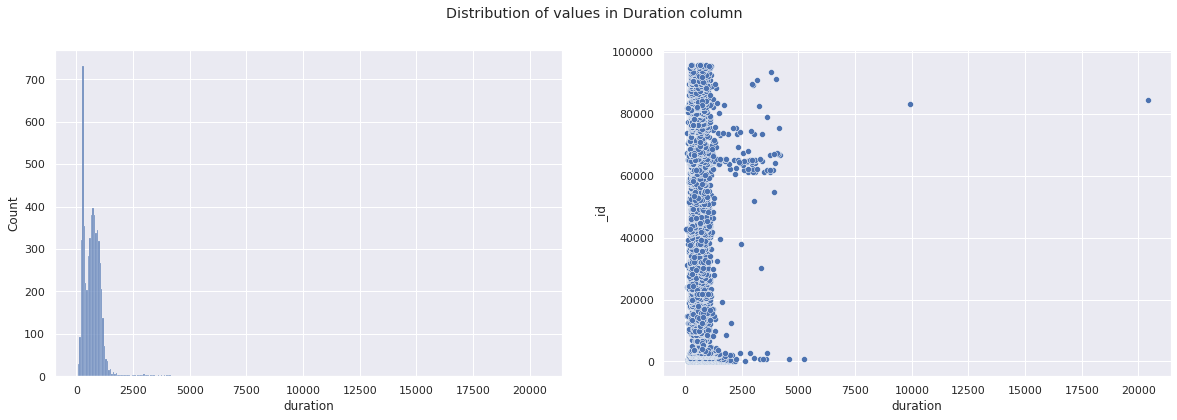

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('Distribution of values in Duration column')

sns.histplot(ax=axes[0], data=df, x='duration')
sns.scatterplot(ax=axes[1], data=df, x='duration', y='_id')

In [12]:
df['duration'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count     5631.000000
mean       707.691529
std        521.179373
min         60.000000
25%        355.000000
50%        682.000000
75%        926.500000
95%       1225.500000
99%       2565.600000
max      20404.000000
Name: duration, dtype: float64


There are some potential outliers, but majority of the talks have duration of under 1250 seconds
***

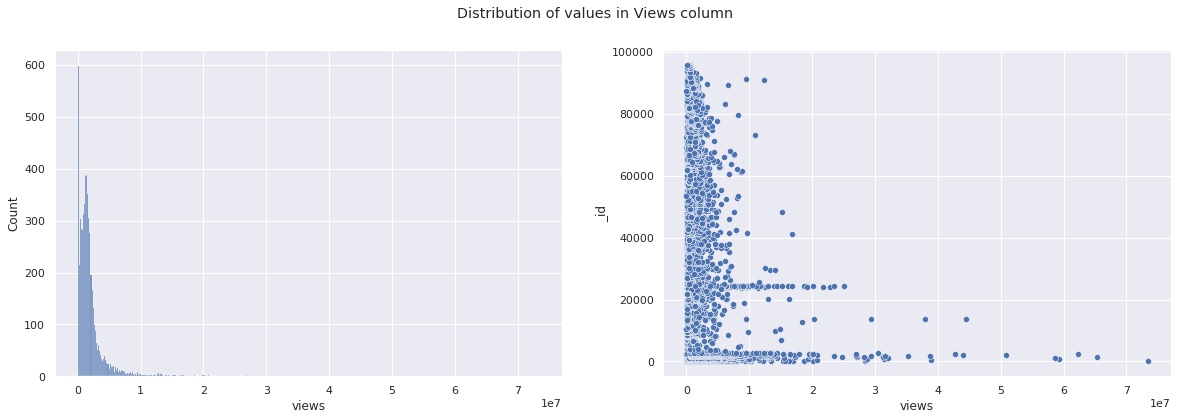

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('Distribution of values in Views column')

sns.histplot(ax=axes[0], data=df, x='views')
sns.scatterplot(ax=axes[1], data=df, x='views', y='_id')

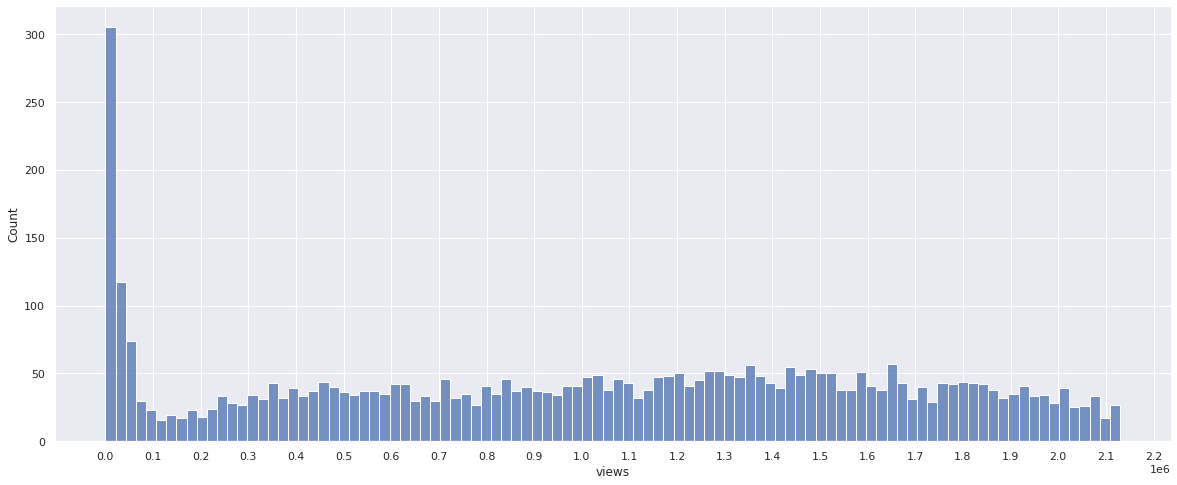

In [14]:
# closer look at the distribution
plt.figure(figsize=(20,8))
plt.xticks(np.arange(min(df['views']), max(df['views']), 100000))
hist = sns.histplot(x=df['views'].loc[df['views'] <= df['views'].mean()], bins=100)
plt.show()

In [15]:
df['views'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).apply('{:.2f}'.format)

count        5631.00
mean      2130394.21
std       3679481.02
min           587.00
25%        678154.00
50%       1392074.00
75%       2182299.50
95%       6440912.50
99%      16493103.90
max      73389142.00
Name: views, dtype: object

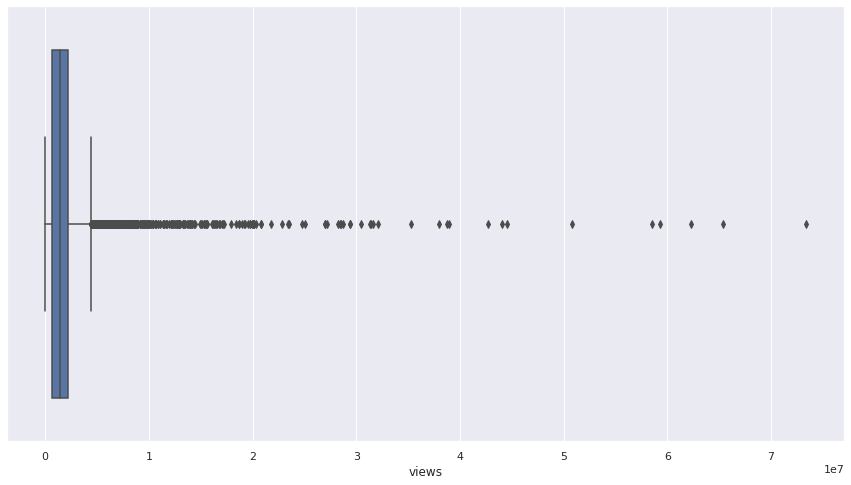

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['views'])

Plots showcase a large amount of outliers, we'll remove extreme cases later when cleaning data
***

In [17]:
df['event'].value_counts()

TED-Ed                  865
TED2018                 104
TED2020                 102
TED2019                 101
TED2017                  97
                       ... 
TEDxIndianapolis          1
TEDSalon NY2015           1
TEDxSouthBank             1
TEDxMuncyStatePrison      1
TEDxSeattleWomen          1
Name: event, Length: 630, dtype: int64

In [18]:
df['likes'].head()

0     17K
1    110K
2     60K
3     80K
4     14K
Name: likes, dtype: object

In [19]:
for col in ['related_videos', 'speakers', 'subtitle_languages', 'topics']:
    print(df[col].head(), end='\n\n')

0        ["144","1282","1379","87","2302","2638"]
1    ["243","547","2093","74405","64693","83767"]
2      ["1725","2274","172","2664","2464","1268"]
3      ["2237","701","1095","1386","76211","242"]
4     ["2228","1476","800","2890","45233","2694"]
Name: related_videos, dtype: object

0    [{"name":"Mena Trott","occupation":"Blogger; c...
1    [{"name":"Al Gore","occupation":"Climate advoc...
2    [{"name":"David Pogue","occupation":"Technolog...
3    [{"name":"David Deutsch","occupation":"Physici...
4    [{"name":"Jehane Noujaim","occupation":"Filmma...
Name: speakers, dtype: object

0    [{"name":"English","code":"en"},{"name":"Vietn...
1    [{"name":"Greek","code":"el"},{"name":"Gujarat...
2    [{"name":"Greek","code":"el"},{"name":"English...
3    [{"name":"Greek","code":"el"},{"name":"English...
4    [{"name":"English","code":"en"},{"name":"Vietn...
Name: subtitle_languages, dtype: object

0    [{"id":"4","name":"culture"},{"id":"13","name"...
1    [{"id":"3","name":"climate chan

These columns contain a list of values, so feature engineering and data cleaning are required to gain meaningful insights from this data
***